In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_frame=pd.read_csv('raw_data_labeled.csv')

In [3]:
y=data_frame['Frequency']
X=data_frame

In [4]:
X.drop("Frequency", axis = 1, inplace = True)

In [5]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_y)

Using TensorFlow backend.


In [7]:
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.layers import Dropout


## Run the below cells only as an alternative

In [70]:
def model():
    model=Sequential()
    model.add(Dense(512,activation='relu',  input_shape=(16,)))
    model.add(Dropout(.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(.1))
    model.add(Dense(8,activation='softmax'))
    opt=SGD(lr=.001,momentum=0.01, decay=0.1)
    model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [74]:
estimator = KerasClassifier(build_fn=model, epochs=100, batch_size=128, verbose=0)

In [75]:
kfold = KFold(n_splits=100, shuffle=True, random_state=121)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KeyboardInterrupt: 

Upto here Always skip till this cell

In [22]:
model=Sequential()
model.add(Dense(1024,activation='relu',  input_shape=(16,)))
model.add(Dropout(.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(8,activation='softmax'))
opt=SGD(lr=.1)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              17408     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                32832     
__________

We got 50,888 parametersto train lets see by running it for a small number of epochs initially

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,dummy_y, test_size=.33)

In [23]:
history=model.fit(X_train, y_train, epochs = 1000, batch_size = 10000)

Epoch 1/1000
60779/60779 [==============================] - 2s 39us/step - loss: 2.1207 - acc: 0.1244
Epoch 2/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0927 - acc: 0.1232
Epoch 3/1000
60779/60779 [==============================] - 2s 35us/step - loss: 2.0878 - acc: 0.1256
Epoch 4/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0863 - acc: 0.1249
Epoch 5/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0845 - acc: 0.1242
Epoch 6/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0834 - acc: 0.1244
Epoch 7/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0838 - acc: 0.1242
Epoch 8/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0820 - acc: 0.1267
Epoch 9/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0823 - acc: 0.1271
Epoch 10/1000
60779/60779 [==============================] - 2s 33us/step - loss: 

60779/60779 [==============================] - 2s 33us/step - loss: 2.0603 - acc: 0.1484
Epoch 81/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0607 - acc: 0.1469
Epoch 82/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0600 - acc: 0.1475
Epoch 83/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0600 - acc: 0.1477
Epoch 84/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0591 - acc: 0.1484
Epoch 85/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0592 - acc: 0.1495
Epoch 86/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0589 - acc: 0.1476
Epoch 87/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0601 - acc: 0.1482
Epoch 88/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0596 - acc: 0.1453
Epoch 89/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.058

60779/60779 [==============================] - 2s 33us/step - loss: 2.0525 - acc: 0.1562
Epoch 160/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0521 - acc: 0.1534
Epoch 161/1000
60779/60779 [==============================] - 2s 38us/step - loss: 2.0521 - acc: 0.1565
Epoch 162/1000
60779/60779 [==============================] - 2s 36us/step - loss: 2.0511 - acc: 0.1572
Epoch 163/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0517 - acc: 0.1551
Epoch 164/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0512 - acc: 0.1567
Epoch 165/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0514 - acc: 0.1559
Epoch 166/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0508 - acc: 0.1564
Epoch 167/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0512 - acc: 0.1574
Epoch 168/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 36us/step - loss: 2.0442 - acc: 0.1626
Epoch 238/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0432 - acc: 0.1645
Epoch 239/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0421 - acc: 0.1636
Epoch 240/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0424 - acc: 0.1650
Epoch 241/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0429 - acc: 0.1643
Epoch 242/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0415 - acc: 0.1644
Epoch 243/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0422 - acc: 0.1641
Epoch 244/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0424 - acc: 0.1632
Epoch 245/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0426 - acc: 0.1636
Epoch 246/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 2.0333 - acc: 0.1714
Epoch 316/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0337 - acc: 0.1713
Epoch 317/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0344 - acc: 0.1719
Epoch 318/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0339 - acc: 0.1720
Epoch 319/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0328 - acc: 0.1725
Epoch 320/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0337 - acc: 0.1727
Epoch 321/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0330 - acc: 0.1725
Epoch 322/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0321 - acc: 0.1730
Epoch 323/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0333 - acc: 0.1720
Epoch 324/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 2.0249 - acc: 0.1774
Epoch 394/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0246 - acc: 0.1768
Epoch 395/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0246 - acc: 0.1783
Epoch 396/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0252 - acc: 0.1784
Epoch 397/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0246 - acc: 0.1790
Epoch 398/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0242 - acc: 0.1783
Epoch 399/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0245 - acc: 0.1783
Epoch 400/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0252 - acc: 0.1771
Epoch 401/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0249 - acc: 0.1771
Epoch 402/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 34us/step - loss: 2.0166 - acc: 0.1854
Epoch 472/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0171 - acc: 0.1848
Epoch 473/1000
60779/60779 [==============================] - 2s 35us/step - loss: 2.0168 - acc: 0.1844
Epoch 474/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0175 - acc: 0.1854
Epoch 475/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0181 - acc: 0.1828
Epoch 476/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0167 - acc: 0.1860
Epoch 477/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0169 - acc: 0.1843
Epoch 478/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0170 - acc: 0.1839
Epoch 479/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0164 - acc: 0.1866
Epoch 480/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 34us/step - loss: 2.0097 - acc: 0.1882
Epoch 550/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0089 - acc: 0.1911
Epoch 551/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0109 - acc: 0.1880
Epoch 552/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0089 - acc: 0.1891
Epoch 553/1000
60779/60779 [==============================] - 2s 36us/step - loss: 2.0088 - acc: 0.1899
Epoch 554/1000
60779/60779 [==============================] - 2s 34us/step - loss: 2.0094 - acc: 0.1901
Epoch 555/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0085 - acc: 0.1898
Epoch 556/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0089 - acc: 0.1916
Epoch 557/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0076 - acc: 0.1911
Epoch 558/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 2.0011 - acc: 0.1947
Epoch 628/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0009 - acc: 0.1953
Epoch 629/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0001 - acc: 0.1953
Epoch 630/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0020 - acc: 0.1943
Epoch 631/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0010 - acc: 0.1945
Epoch 632/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0007 - acc: 0.1933
Epoch 633/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0005 - acc: 0.1949
Epoch 634/1000
60779/60779 [==============================] - 2s 33us/step - loss: 2.0002 - acc: 0.1931
Epoch 635/1000
60779/60779 [==============================] - 2s 35us/step - loss: 2.0004 - acc: 0.1940
Epoch 636/1000
60779/60779 [==============================] - 2s 35us/step - lo

60779/60779 [==============================] - 2s 36us/step - loss: 1.9935 - acc: 0.1992
Epoch 706/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9937 - acc: 0.1969
Epoch 707/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9927 - acc: 0.1985
Epoch 708/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.9941 - acc: 0.1997
Epoch 709/1000
60779/60779 [==============================] - 2s 36us/step - loss: 1.9931 - acc: 0.1977
Epoch 710/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9936 - acc: 0.1984
Epoch 711/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9935 - acc: 0.1979
Epoch 712/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9936 - acc: 0.1989
Epoch 713/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9919 - acc: 0.2008
Epoch 714/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9858 - acc: 0.2040
Epoch 784/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9828 - acc: 0.2056
Epoch 785/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9845 - acc: 0.2048
Epoch 786/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9850 - acc: 0.2060
Epoch 787/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9843 - acc: 0.2054
Epoch 788/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9866 - acc: 0.2035
Epoch 789/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9833 - acc: 0.2061
Epoch 790/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9851 - acc: 0.2039
Epoch 791/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9837 - acc: 0.2043
Epoch 792/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9753 - acc: 0.2110
Epoch 862/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9775 - acc: 0.2105
Epoch 863/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9794 - acc: 0.2097
Epoch 864/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9782 - acc: 0.2094
Epoch 865/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9762 - acc: 0.2078
Epoch 866/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9785 - acc: 0.2092
Epoch 867/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9789 - acc: 0.2093
Epoch 868/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9765 - acc: 0.2081
Epoch 869/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9747 - acc: 0.2129
Epoch 870/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9698 - acc: 0.2128
Epoch 940/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9701 - acc: 0.2139
Epoch 941/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9704 - acc: 0.2141
Epoch 942/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9696 - acc: 0.2131
Epoch 943/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9703 - acc: 0.2133
Epoch 944/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9673 - acc: 0.2144
Epoch 945/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9714 - acc: 0.2127
Epoch 946/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9674 - acc: 0.2136
Epoch 947/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9684 - acc: 0.2134
Epoch 948/1000
60779/60779 [==============================] - 2s 33us/step - lo

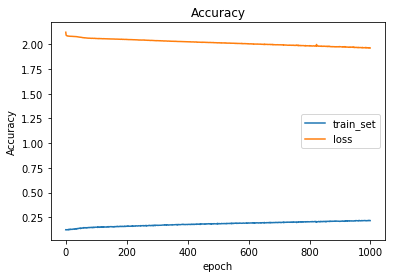

In [25]:
plt.plot(history.history['acc'],label='train_set')
plt.plot(history.history['loss'], label='loss')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
from keras.callbacks import ModelCheckpoint
import h5py
checkpoint_filepath = 'weights.best.my.hdf5'

my_checkpointer = ModelCheckpoint(filepath=checkpoint_filepath,
                               verbose=1, save_best_only=True)

history=model.fit(X_train, y_train, epochs = 1000, batch_size = 10000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9633 - acc: 0.2198
Epoch 2/1000


/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60779/60779 [==============================] - 2s 34us/step - loss: 1.9616 - acc: 0.2187
Epoch 3/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9620 - acc: 0.2180
Epoch 4/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9632 - acc: 0.2181
Epoch 5/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9616 - acc: 0.2177
Epoch 6/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9650 - acc: 0.2181
Epoch 7/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9624 - acc: 0.2173
Epoch 8/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9636 - acc: 0.2160
Epoch 9/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9605 - acc: 0.2186
Epoch 10/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9620 - acc: 0.2187
Epoch 11/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9628 - acc

60779/60779 [==============================] - 2s 32us/step - loss: 1.9536 - acc: 0.2254
Epoch 82/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9540 - acc: 0.2244
Epoch 83/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9537 - acc: 0.2268
Epoch 84/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9533 - acc: 0.2225
Epoch 85/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9540 - acc: 0.2235
Epoch 86/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9538 - acc: 0.2254
Epoch 87/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9565 - acc: 0.2230
Epoch 88/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9545 - acc: 0.2237
Epoch 89/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9537 - acc: 0.2227
Epoch 90/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.954

60779/60779 [==============================] - 2s 33us/step - loss: 1.9456 - acc: 0.2279
Epoch 161/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9451 - acc: 0.2313
Epoch 162/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9449 - acc: 0.2300
Epoch 163/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9457 - acc: 0.2304
Epoch 164/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9503 - acc: 0.2273
Epoch 165/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9447 - acc: 0.2297
Epoch 166/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9473 - acc: 0.2269
Epoch 167/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9448 - acc: 0.2295
Epoch 168/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9436 - acc: 0.2307
Epoch 169/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 36us/step - loss: 1.9372 - acc: 0.2344
Epoch 239/1000
60779/60779 [==============================] - 2s 36us/step - loss: 1.9380 - acc: 0.2332
Epoch 240/1000
60779/60779 [==============================] - 2s 36us/step - loss: 1.9369 - acc: 0.2349
Epoch 241/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.9349 - acc: 0.2354
Epoch 242/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9372 - acc: 0.2341
Epoch 243/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9336 - acc: 0.2357
Epoch 244/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9365 - acc: 0.2351
Epoch 245/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9369 - acc: 0.2338
Epoch 246/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.9365 - acc: 0.2339
Epoch 247/1000
60779/60779 [==============================] - 2s 36us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.9304 - acc: 0.2385
Epoch 317/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9273 - acc: 0.2387
Epoch 318/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9283 - acc: 0.2378
Epoch 319/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9255 - acc: 0.2411
Epoch 320/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9270 - acc: 0.2360
Epoch 321/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9305 - acc: 0.2374
Epoch 322/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9264 - acc: 0.2392
Epoch 323/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9275 - acc: 0.2412
Epoch 324/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9316 - acc: 0.2362
Epoch 325/1000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 38us/step - loss: 1.9218 - acc: 0.2426
Epoch 395/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.9175 - acc: 0.2430
Epoch 396/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.9194 - acc: 0.2413
Epoch 397/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9206 - acc: 0.2423
Epoch 398/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9191 - acc: 0.2436
Epoch 399/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9188 - acc: 0.2464
Epoch 400/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9201 - acc: 0.2436
Epoch 401/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9190 - acc: 0.2444
Epoch 402/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9168 - acc: 0.2469
Epoch 403/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.9101 - acc: 0.2487
Epoch 473/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9114 - acc: 0.2509
Epoch 474/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9090 - acc: 0.2491
Epoch 475/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9121 - acc: 0.2485
Epoch 476/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.9102 - acc: 0.2472
Epoch 477/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9087 - acc: 0.2497
Epoch 478/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9096 - acc: 0.2485
Epoch 479/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9085 - acc: 0.2499
Epoch 480/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9096 - acc: 0.2507
Epoch 481/1000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.9036 - acc: 0.2514
Epoch 551/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9055 - acc: 0.2531
Epoch 552/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9035 - acc: 0.2526
Epoch 553/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9004 - acc: 0.2550
Epoch 554/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8997 - acc: 0.2570
Epoch 555/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9045 - acc: 0.2535
Epoch 556/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8987 - acc: 0.2566
Epoch 557/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9004 - acc: 0.2525
Epoch 558/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9004 - acc: 0.2553
Epoch 559/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.8986 - acc: 0.2552
Epoch 629/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8915 - acc: 0.2600
Epoch 630/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8959 - acc: 0.2602
Epoch 631/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.2754 - acc: 0.2053
Epoch 632/1000
60779/60779 [==============================] - 2s 32us/step - loss: 2.0079 - acc: 0.1957
Epoch 633/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9858 - acc: 0.2062
Epoch 634/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9777 - acc: 0.2121
Epoch 635/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9672 - acc: 0.2185
Epoch 636/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.9613 - acc: 0.2206
Epoch 637/1000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.8859 - acc: 0.2637
Epoch 707/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8891 - acc: 0.2623
Epoch 708/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8856 - acc: 0.2610
Epoch 709/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8860 - acc: 0.2633
Epoch 710/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8834 - acc: 0.2653
Epoch 711/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8880 - acc: 0.2623
Epoch 712/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8840 - acc: 0.2642
Epoch 713/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8876 - acc: 0.2625
Epoch 714/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8883 - acc: 0.2612
Epoch 715/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8758 - acc: 0.2687
Epoch 785/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8744 - acc: 0.2698
Epoch 786/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8783 - acc: 0.2662
Epoch 787/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8755 - acc: 0.2708
Epoch 788/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8752 - acc: 0.2672
Epoch 789/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8809 - acc: 0.2652
Epoch 790/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8796 - acc: 0.2670
Epoch 791/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8703 - acc: 0.2703
Epoch 792/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8774 - acc: 0.2680
Epoch 793/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8674 - acc: 0.2722
Epoch 863/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8640 - acc: 0.2742
Epoch 864/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8664 - acc: 0.2753
Epoch 865/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8674 - acc: 0.2725
Epoch 866/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8642 - acc: 0.2747
Epoch 867/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8663 - acc: 0.2736
Epoch 868/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8631 - acc: 0.2767
Epoch 869/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8648 - acc: 0.2744
Epoch 870/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8638 - acc: 0.2736
Epoch 871/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8555 - acc: 0.2806
Epoch 941/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8534 - acc: 0.2788
Epoch 942/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8539 - acc: 0.2790
Epoch 943/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8555 - acc: 0.2795
Epoch 944/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8550 - acc: 0.2813
Epoch 945/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8563 - acc: 0.2785
Epoch 946/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8557 - acc: 0.2789
Epoch 947/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8580 - acc: 0.2803
Epoch 948/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8517 - acc: 0.2822
Epoch 949/1000
60779/60779 [==============================] - 2s 33us/step - lo

In [27]:
history=model.fit(X_train, y_train, epochs = 1000, batch_size = 20000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8632 - acc: 0.2773
Epoch 2/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8590 - acc: 0.2824
Epoch 3/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8478 - acc: 0.2844
Epoch 4/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8524 - acc: 0.2802
Epoch 5/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8490 - acc: 0.2808
Epoch 6/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8591 - acc: 0.2818
Epoch 7/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8566 - acc: 0.2794
Epoch 8/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8528 - acc: 0.2834
Epoch 9/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8630 - acc: 0.2797
Epoch 10/1000
60779/60779 [==============================] - 2s 33us/step - loss: 

60779/60779 [==============================] - 2s 35us/step - loss: 1.8488 - acc: 0.2854
Epoch 81/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8478 - acc: 0.2857
Epoch 82/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8508 - acc: 0.2822
Epoch 83/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8470 - acc: 0.2828
Epoch 84/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8446 - acc: 0.2879
Epoch 85/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8526 - acc: 0.2837
Epoch 86/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8521 - acc: 0.2810
Epoch 87/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8478 - acc: 0.2854
Epoch 88/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8456 - acc: 0.2845
Epoch 89/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.842

60779/60779 [==============================] - 2s 33us/step - loss: 1.8436 - acc: 0.2866
Epoch 160/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8514 - acc: 0.2807
Epoch 161/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8432 - acc: 0.2861
Epoch 162/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8420 - acc: 0.2862
Epoch 163/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8428 - acc: 0.2873
Epoch 164/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8393 - acc: 0.2894
Epoch 165/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8523 - acc: 0.2821
Epoch 166/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8435 - acc: 0.2874
Epoch 167/1000
60779/60779 [==============================] - 2s 37us/step - loss: 1.8433 - acc: 0.2865
Epoch 168/1000
60779/60779 [==============================] - 2s 37us/step - lo

60779/60779 [==============================] - 2s 35us/step - loss: 1.8422 - acc: 0.2866
Epoch 238/1000
60779/60779 [==============================] - 2s 36us/step - loss: 1.8449 - acc: 0.2897
Epoch 239/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.8345 - acc: 0.2927
Epoch 240/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.8357 - acc: 0.2886
Epoch 241/1000
60779/60779 [==============================] - 2s 36us/step - loss: 1.8429 - acc: 0.2878
Epoch 242/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.8406 - acc: 0.2863
Epoch 243/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8352 - acc: 0.2901
Epoch 244/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8323 - acc: 0.2941
Epoch 245/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8327 - acc: 0.2939
Epoch 246/1000
60779/60779 [==============================] - 2s 36us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8286 - acc: 0.2949
Epoch 316/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8246 - acc: 0.2948
Epoch 317/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8310 - acc: 0.2958
Epoch 318/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8325 - acc: 0.2928
Epoch 319/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8362 - acc: 0.2889
Epoch 320/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8326 - acc: 0.2920
Epoch 321/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8305 - acc: 0.2929
Epoch 322/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8268 - acc: 0.2948
Epoch 323/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8342 - acc: 0.2917
Epoch 324/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8225 - acc: 0.2972
Epoch 394/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8355 - acc: 0.2933
Epoch 395/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8256 - acc: 0.2941
Epoch 396/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8184 - acc: 0.2987
Epoch 397/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8275 - acc: 0.2965
Epoch 398/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8277 - acc: 0.2957
Epoch 399/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8265 - acc: 0.2987
Epoch 400/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8319 - acc: 0.2919
Epoch 401/1000
60779/60779 [==============================] - 2s 32us/step - loss: 1.8273 - acc: 0.2934
Epoch 402/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8206 - acc: 0.3006
Epoch 472/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8215 - acc: 0.2982
Epoch 473/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8181 - acc: 0.2991
Epoch 474/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8139 - acc: 0.3033
Epoch 475/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8204 - acc: 0.2990
Epoch 476/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8212 - acc: 0.3003
Epoch 477/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8151 - acc: 0.3042
Epoch 478/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8215 - acc: 0.3014
Epoch 479/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8225 - acc: 0.2969
Epoch 480/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8245 - acc: 0.2971
Epoch 550/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8232 - acc: 0.3014
Epoch 551/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8167 - acc: 0.3004
Epoch 552/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8272 - acc: 0.2997
Epoch 553/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8091 - acc: 0.3078
Epoch 554/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8181 - acc: 0.3004
Epoch 555/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8112 - acc: 0.3019
Epoch 556/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8120 - acc: 0.3028
Epoch 557/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8093 - acc: 0.3057
Epoch 558/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8008 - acc: 0.3064
Epoch 628/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8073 - acc: 0.3056
Epoch 629/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8125 - acc: 0.3019
Epoch 630/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8032 - acc: 0.3082
Epoch 631/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8137 - acc: 0.3040
Epoch 632/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8170 - acc: 0.3032
Epoch 633/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8059 - acc: 0.3062
Epoch 634/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8082 - acc: 0.3057
Epoch 635/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8090 - acc: 0.3040
Epoch 636/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.8047 - acc: 0.3067
Epoch 706/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.8087 - acc: 0.3072
Epoch 707/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8014 - acc: 0.3096
Epoch 708/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8069 - acc: 0.3075
Epoch 709/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8006 - acc: 0.3084
Epoch 710/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8026 - acc: 0.3091
Epoch 711/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8017 - acc: 0.3077
Epoch 712/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.8033 - acc: 0.3069
Epoch 713/1000
60779/60779 [==============================] - 2s 35us/step - loss: 1.8036 - acc: 0.3091
Epoch 714/1000
60779/60779 [==============================] - 2s 36us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7938 - acc: 0.3137
Epoch 784/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7933 - acc: 0.3116
Epoch 785/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7931 - acc: 0.3133
Epoch 786/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.8067 - acc: 0.3087
Epoch 787/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7914 - acc: 0.3124
Epoch 788/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7924 - acc: 0.3107
Epoch 789/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7953 - acc: 0.3107
Epoch 790/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7903 - acc: 0.3128
Epoch 791/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7989 - acc: 0.3116
Epoch 792/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7898 - acc: 0.3170
Epoch 862/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7891 - acc: 0.3166
Epoch 863/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7810 - acc: 0.3182
Epoch 864/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7892 - acc: 0.3154
Epoch 865/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7916 - acc: 0.3140
Epoch 866/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7874 - acc: 0.3178
Epoch 867/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7860 - acc: 0.3173
Epoch 868/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7895 - acc: 0.3139
Epoch 869/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7877 - acc: 0.3171
Epoch 870/1000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7895 - acc: 0.3147
Epoch 940/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7834 - acc: 0.3203
Epoch 941/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7881 - acc: 0.3165
Epoch 942/1000
60779/60779 [==============================] - 2s 34us/step - loss: 1.7787 - acc: 0.3207
Epoch 943/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7842 - acc: 0.3178
Epoch 944/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7782 - acc: 0.3223
Epoch 945/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7805 - acc: 0.3173
Epoch 946/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7919 - acc: 0.3163
Epoch 947/1000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7820 - acc: 0.3162
Epoch 948/1000
60779/60779 [==============================] - 2s 33us/step - lo

In [28]:
history=model.fit(X_train, y_train, epochs = 5000, batch_size = 10000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.7713 - acc: 0.3238
Epoch 2/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7667 - acc: 0.3247
Epoch 3/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7662 - acc: 0.3278
Epoch 4/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7692 - acc: 0.3231
Epoch 5/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7660 - acc: 0.3275
Epoch 6/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7686 - acc: 0.3265
Epoch 7/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7670 - acc: 0.3248
Epoch 8/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7625 - acc: 0.3241
Epoch 9/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7654 - acc: 0.3272
Epoch 10/5000
60779/60779 [==============================] - 2s 33us/step - loss: 

60779/60779 [==============================] - 2s 33us/step - loss: 1.7617 - acc: 0.3282
Epoch 81/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7566 - acc: 0.3313
Epoch 82/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7521 - acc: 0.3335
Epoch 83/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7518 - acc: 0.3349
Epoch 84/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7644 - acc: 0.3296
Epoch 85/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7565 - acc: 0.3310
Epoch 86/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7568 - acc: 0.3295
Epoch 87/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7617 - acc: 0.3294
Epoch 88/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7600 - acc: 0.3328
Epoch 89/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.754

60779/60779 [==============================] - 2s 33us/step - loss: 1.7467 - acc: 0.3384
Epoch 160/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7448 - acc: 0.3371
Epoch 161/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7459 - acc: 0.3360
Epoch 162/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7469 - acc: 0.3349
Epoch 163/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7488 - acc: 0.3367
Epoch 164/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7457 - acc: 0.3350
Epoch 165/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.7439 - acc: 0.3365
Epoch 166/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7450 - acc: 0.3377
Epoch 167/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7430 - acc: 0.3381
Epoch 168/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7307 - acc: 0.3416
Epoch 238/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7361 - acc: 0.3415
Epoch 239/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7308 - acc: 0.3451
Epoch 240/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7311 - acc: 0.3431
Epoch 241/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7392 - acc: 0.3417
Epoch 242/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7307 - acc: 0.3446
Epoch 243/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7304 - acc: 0.3422
Epoch 244/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7323 - acc: 0.3437
Epoch 245/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7368 - acc: 0.3408
Epoch 246/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7261 - acc: 0.3461
Epoch 316/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7238 - acc: 0.3476
Epoch 317/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7255 - acc: 0.3444
Epoch 318/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7235 - acc: 0.3476
Epoch 319/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7253 - acc: 0.3495
Epoch 320/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7270 - acc: 0.3467
Epoch 321/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7262 - acc: 0.3449
Epoch 322/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7269 - acc: 0.3455
Epoch 323/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7274 - acc: 0.3453
Epoch 324/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.7090 - acc: 0.3572
Epoch 394/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.7070 - acc: 0.3550
Epoch 395/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7088 - acc: 0.3552
Epoch 396/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.7149 - acc: 0.3539
Epoch 397/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7062 - acc: 0.3591
Epoch 398/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7142 - acc: 0.3530
Epoch 399/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7082 - acc: 0.3559
Epoch 400/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7059 - acc: 0.3560
Epoch 401/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7077 - acc: 0.3553
Epoch 402/5000
60779/60779 [==============================] - 2s 34us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6995 - acc: 0.3601
Epoch 472/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6986 - acc: 0.3599
Epoch 473/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6991 - acc: 0.3604
Epoch 474/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7117 - acc: 0.3528
Epoch 475/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6998 - acc: 0.3589
Epoch 476/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7058 - acc: 0.3555
Epoch 477/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.7032 - acc: 0.3579
Epoch 478/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6962 - acc: 0.3576
Epoch 479/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6933 - acc: 0.3625
Epoch 480/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6880 - acc: 0.3650
Epoch 550/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6807 - acc: 0.3670
Epoch 551/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6877 - acc: 0.3650
Epoch 552/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6866 - acc: 0.3678
Epoch 553/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6991 - acc: 0.3607
Epoch 554/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6905 - acc: 0.3654
Epoch 555/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6845 - acc: 0.3672
Epoch 556/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6838 - acc: 0.3675
Epoch 557/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6946 - acc: 0.3630
Epoch 558/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6784 - acc: 0.3704
Epoch 628/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6759 - acc: 0.3704
Epoch 629/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6734 - acc: 0.3692
Epoch 630/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6733 - acc: 0.3721
Epoch 631/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6874 - acc: 0.3678
Epoch 632/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6898 - acc: 0.3665
Epoch 633/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6711 - acc: 0.3726
Epoch 634/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6755 - acc: 0.3712
Epoch 635/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6769 - acc: 0.3727
Epoch 636/5000
60779/60779 [==============================] - 2s 32us/step - lo

60779/60779 [==============================] - 2s 32us/step - loss: 1.6609 - acc: 0.3799
Epoch 706/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6634 - acc: 0.3774
Epoch 707/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6692 - acc: 0.3762
Epoch 708/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6694 - acc: 0.3746
Epoch 709/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6656 - acc: 0.3777
Epoch 710/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6689 - acc: 0.3749
Epoch 711/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6636 - acc: 0.3768
Epoch 712/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6691 - acc: 0.3775
Epoch 713/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6640 - acc: 0.3776
Epoch 714/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6590 - acc: 0.3773
Epoch 784/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.6537 - acc: 0.3832
Epoch 785/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.6469 - acc: 0.3842
Epoch 786/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6571 - acc: 0.3808
Epoch 787/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6606 - acc: 0.3787
Epoch 788/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6581 - acc: 0.3791
Epoch 789/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6572 - acc: 0.3797
Epoch 790/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6464 - acc: 0.3845
Epoch 791/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6499 - acc: 0.3807
Epoch 792/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6531 - acc: 0.3849
Epoch 862/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.6502 - acc: 0.3847
Epoch 863/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6506 - acc: 0.3830
Epoch 864/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6484 - acc: 0.3864
Epoch 865/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6405 - acc: 0.3888
Epoch 866/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.6451 - acc: 0.3846
Epoch 867/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6438 - acc: 0.3888
Epoch 868/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6433 - acc: 0.3896
Epoch 869/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6396 - acc: 0.3885
Epoch 870/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6299 - acc: 0.3909
Epoch 940/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6280 - acc: 0.3958
Epoch 941/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6241 - acc: 0.3944
Epoch 942/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6413 - acc: 0.3894
Epoch 943/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6336 - acc: 0.3927
Epoch 944/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6256 - acc: 0.3953
Epoch 945/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6320 - acc: 0.3936
Epoch 946/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6278 - acc: 0.3957
Epoch 947/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6272 - acc: 0.3958
Epoch 948/5000
60779/60779 [==============================] - 2s 33us/step - lo

60779/60779 [==============================] - 2s 33us/step - loss: 1.6233 - acc: 0.3973
Epoch 1018/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6268 - acc: 0.3951
Epoch 1019/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6242 - acc: 0.3961
Epoch 1020/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6341 - acc: 0.3910
Epoch 1021/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6280 - acc: 0.3955
Epoch 1022/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6174 - acc: 0.3998
Epoch 1023/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6190 - acc: 0.3969
Epoch 1024/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6136 - acc: 0.3995
Epoch 1025/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6217 - acc: 0.3972
Epoch 1026/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.6040 - acc: 0.4046
Epoch 1096/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6100 - acc: 0.4024
Epoch 1097/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6127 - acc: 0.4025
Epoch 1098/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6134 - acc: 0.4019
Epoch 1099/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6111 - acc: 0.4038
Epoch 1100/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.6103 - acc: 0.4021
Epoch 1101/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6112 - acc: 0.4037
Epoch 1102/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6101 - acc: 0.4028
Epoch 1103/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5982 - acc: 0.4058
Epoch 1104/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.6136 - acc: 0.4004
Epoch 1174/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6059 - acc: 0.4047
Epoch 1175/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.6057 - acc: 0.4041
Epoch 1176/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5893 - acc: 0.4096
Epoch 1177/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5931 - acc: 0.4102
Epoch 1178/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5997 - acc: 0.4066
Epoch 1179/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5985 - acc: 0.4094
Epoch 1180/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5968 - acc: 0.4080
Epoch 1181/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.6043 - acc: 0.4070
Epoch 1182/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 32us/step - loss: 1.5780 - acc: 0.4162
Epoch 1252/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5768 - acc: 0.4183
Epoch 1253/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5865 - acc: 0.4151
Epoch 1254/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5898 - acc: 0.4113
Epoch 1255/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5921 - acc: 0.4101
Epoch 1256/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5910 - acc: 0.4108
Epoch 1257/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5846 - acc: 0.4142
Epoch 1258/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5830 - acc: 0.4159
Epoch 1259/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5820 - acc: 0.4185
Epoch 1260/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5811 - acc: 0.4158
Epoch 1330/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5815 - acc: 0.4158
Epoch 1331/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5738 - acc: 0.4185
Epoch 1332/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5791 - acc: 0.4174
Epoch 1333/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5897 - acc: 0.4118
Epoch 1334/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5703 - acc: 0.4195
Epoch 1335/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5738 - acc: 0.4189
Epoch 1336/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5825 - acc: 0.4167
Epoch 1337/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5765 - acc: 0.4182
Epoch 1338/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5640 - acc: 0.4224
Epoch 1408/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5675 - acc: 0.4231
Epoch 1409/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5688 - acc: 0.4244
Epoch 1410/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5659 - acc: 0.4225
Epoch 1411/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5755 - acc: 0.4202
Epoch 1412/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5667 - acc: 0.4225
Epoch 1413/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5668 - acc: 0.4225
Epoch 1414/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5611 - acc: 0.4242
Epoch 1415/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5709 - acc: 0.4188
Epoch 1416/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5594 - acc: 0.4278
Epoch 1486/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5554 - acc: 0.4285
Epoch 1487/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5613 - acc: 0.4259
Epoch 1488/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5593 - acc: 0.4247
Epoch 1489/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5486 - acc: 0.4291
Epoch 1490/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5478 - acc: 0.4316
Epoch 1491/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5552 - acc: 0.4290
Epoch 1492/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5605 - acc: 0.4275
Epoch 1493/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5616 - acc: 0.4305
Epoch 1494/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5539 - acc: 0.4259
Epoch 1564/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5558 - acc: 0.4291
Epoch 1565/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5393 - acc: 0.4348
Epoch 1566/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5554 - acc: 0.4312
Epoch 1567/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5429 - acc: 0.4343
Epoch 1568/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5440 - acc: 0.4350
Epoch 1569/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5417 - acc: 0.4339
Epoch 1570/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5410 - acc: 0.4353
Epoch 1571/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5674 - acc: 0.4268
Epoch 1572/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5280 - acc: 0.4397
Epoch 1642/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5358 - acc: 0.4389
Epoch 1643/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5375 - acc: 0.4369
Epoch 1644/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5370 - acc: 0.4365
Epoch 1645/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5398 - acc: 0.4377
Epoch 1646/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5287 - acc: 0.4401
Epoch 1647/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5312 - acc: 0.4385
Epoch 1648/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5316 - acc: 0.4405
Epoch 1649/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5283 - acc: 0.4417
Epoch 1650/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5290 - acc: 0.4408
Epoch 1720/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5207 - acc: 0.4422
Epoch 1721/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5289 - acc: 0.4397
Epoch 1722/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5212 - acc: 0.4444
Epoch 1723/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5257 - acc: 0.4406
Epoch 1724/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5239 - acc: 0.4413
Epoch 1725/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5334 - acc: 0.4401
Epoch 1726/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5265 - acc: 0.4429
Epoch 1727/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5334 - acc: 0.4411
Epoch 1728/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5030 - acc: 0.4523
Epoch 1798/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5305 - acc: 0.4402
Epoch 1799/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5213 - acc: 0.4440
Epoch 1800/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5242 - acc: 0.4449
Epoch 1801/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5211 - acc: 0.4455
Epoch 1802/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5195 - acc: 0.4465
Epoch 1803/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5129 - acc: 0.4478
Epoch 1804/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5162 - acc: 0.4445
Epoch 1805/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5164 - acc: 0.4451
Epoch 1806/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.5089 - acc: 0.4505
Epoch 1876/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5192 - acc: 0.4444
Epoch 1877/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5066 - acc: 0.4510
Epoch 1878/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5098 - acc: 0.4483
Epoch 1879/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5180 - acc: 0.4485
Epoch 1880/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.5087 - acc: 0.4476
Epoch 1881/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5085 - acc: 0.4480
Epoch 1882/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5078 - acc: 0.4513
Epoch 1883/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.5304 - acc: 0.4434
Epoch 1884/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.5092 - acc: 0.4498
Epoch 1954/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.4951 - acc: 0.4544
Epoch 1955/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.4953 - acc: 0.4568
Epoch 1956/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.5089 - acc: 0.4532
Epoch 1957/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.5104 - acc: 0.4480
Epoch 1958/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.5012 - acc: 0.4544
Epoch 1959/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.4933 - acc: 0.4556
Epoch 1960/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.5013 - acc: 0.4507
Epoch 1961/5000
60779/60779 [==============================] - 3s 44us/step - loss: 1.4953 - acc: 0.4582
Epoch 1962/5000
60779/60779 [==============================] - 3s 44us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.4883 - acc: 0.4565
Epoch 2032/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.4862 - acc: 0.4592
Epoch 2033/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4963 - acc: 0.4555
Epoch 2034/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4863 - acc: 0.4590
Epoch 2035/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4937 - acc: 0.4581
Epoch 2036/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4883 - acc: 0.4582
Epoch 2037/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4842 - acc: 0.4593
Epoch 2038/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4967 - acc: 0.4583
Epoch 2039/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4835 - acc: 0.4616
Epoch 2040/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 39us/step - loss: 1.4824 - acc: 0.4624
Epoch 2110/5000
60779/60779 [==============================] - 3s 42us/step - loss: 1.4836 - acc: 0.4629
Epoch 2111/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4958 - acc: 0.4561
Epoch 2112/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4733 - acc: 0.4641
Epoch 2113/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4723 - acc: 0.4641
Epoch 2114/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4756 - acc: 0.4652
Epoch 2115/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4985 - acc: 0.4566
Epoch 2116/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4841 - acc: 0.4589
Epoch 2117/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4725 - acc: 0.4654
Epoch 2118/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.4733 - acc: 0.4650
Epoch 2188/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4774 - acc: 0.4639
Epoch 2189/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4786 - acc: 0.4657
Epoch 2190/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4725 - acc: 0.4632
Epoch 2191/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4744 - acc: 0.4630
Epoch 2192/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4782 - acc: 0.4639
Epoch 2193/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4781 - acc: 0.4642
Epoch 2194/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4738 - acc: 0.4668
Epoch 2195/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4718 - acc: 0.4676
Epoch 2196/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 38us/step - loss: 1.4572 - acc: 0.4722
Epoch 2266/5000
60779/60779 [==============================] - 3s 46us/step - loss: 1.4747 - acc: 0.4693
Epoch 2267/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.4603 - acc: 0.4721
Epoch 2268/5000
60779/60779 [==============================] - 3s 50us/step - loss: 1.4645 - acc: 0.4680
Epoch 2269/5000
60779/60779 [==============================] - 3s 44us/step - loss: 1.4552 - acc: 0.4740
Epoch 2270/5000
60779/60779 [==============================] - 3s 42us/step - loss: 1.4742 - acc: 0.4647
Epoch 2271/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.4585 - acc: 0.4686
Epoch 2272/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4643 - acc: 0.4681
Epoch 2273/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4728 - acc: 0.4660
Epoch 2274/5000
60779/60779 [==============================] - 2s 37us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.4555 - acc: 0.4748
Epoch 2344/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4567 - acc: 0.4735
Epoch 2345/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4679 - acc: 0.4687
Epoch 2346/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4595 - acc: 0.4737
Epoch 2347/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4504 - acc: 0.4745
Epoch 2348/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4645 - acc: 0.4707
Epoch 2349/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4552 - acc: 0.4748
Epoch 2350/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4603 - acc: 0.4708
Epoch 2351/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.4529 - acc: 0.4769
Epoch 2352/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4469 - acc: 0.4762
Epoch 2422/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4422 - acc: 0.4803
Epoch 2423/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4462 - acc: 0.4754
Epoch 2424/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4559 - acc: 0.4736
Epoch 2425/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4523 - acc: 0.4758
Epoch 2426/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4649 - acc: 0.4691
Epoch 2427/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4517 - acc: 0.4762
Epoch 2428/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4422 - acc: 0.4782
Epoch 2429/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4465 - acc: 0.4771
Epoch 2430/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4480 - acc: 0.4780
Epoch 2500/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4412 - acc: 0.4804
Epoch 2501/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4332 - acc: 0.4831
Epoch 2502/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4379 - acc: 0.4806
Epoch 2503/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4299 - acc: 0.4840
Epoch 2504/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4479 - acc: 0.4770
Epoch 2505/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4419 - acc: 0.4796
Epoch 2506/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4446 - acc: 0.4804
Epoch 2507/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4366 - acc: 0.4814
Epoch 2508/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 3s 44us/step - loss: 1.4279 - acc: 0.4871
Epoch 2578/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4310 - acc: 0.4855
Epoch 2579/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4405 - acc: 0.4828
Epoch 2580/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4313 - acc: 0.4834
Epoch 2581/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4279 - acc: 0.4850
Epoch 2582/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4374 - acc: 0.4805
Epoch 2583/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4383 - acc: 0.4798
Epoch 2584/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4441 - acc: 0.4789
Epoch 2585/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4337 - acc: 0.4832
Epoch 2586/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4294 - acc: 0.4833
Epoch 2656/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4237 - acc: 0.4862
Epoch 2657/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4176 - acc: 0.4919
Epoch 2658/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4314 - acc: 0.4859
Epoch 2659/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4273 - acc: 0.4857
Epoch 2660/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4317 - acc: 0.4845
Epoch 2661/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4200 - acc: 0.4914
Epoch 2662/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4223 - acc: 0.4882
Epoch 2663/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4194 - acc: 0.4898
Epoch 2664/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4227 - acc: 0.4905
Epoch 2734/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4140 - acc: 0.4898
Epoch 2735/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4223 - acc: 0.4882
Epoch 2736/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4195 - acc: 0.4896
Epoch 2737/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4181 - acc: 0.4914
Epoch 2738/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4192 - acc: 0.4865
Epoch 2739/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4333 - acc: 0.4814
Epoch 2740/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4300 - acc: 0.4853
Epoch 2741/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4260 - acc: 0.4852
Epoch 2742/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 39us/step - loss: 1.4282 - acc: 0.4861
Epoch 2812/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4119 - acc: 0.4925
Epoch 2813/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4039 - acc: 0.4978
Epoch 2814/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4216 - acc: 0.4898
Epoch 2815/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4150 - acc: 0.4911
Epoch 2816/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4079 - acc: 0.4943
Epoch 2817/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.4035 - acc: 0.4974
Epoch 2818/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.4127 - acc: 0.4937
Epoch 2819/5000
60779/60779 [==============================] - 2s 39us/step - loss: 1.4152 - acc: 0.4904
Epoch 2820/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 39us/step - loss: 1.4130 - acc: 0.4924
Epoch 2890/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.4062 - acc: 0.4946
Epoch 2891/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4151 - acc: 0.4921
Epoch 2892/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.4153 - acc: 0.4903
Epoch 2893/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4024 - acc: 0.4973
Epoch 2894/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4069 - acc: 0.4951
Epoch 2895/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4066 - acc: 0.4976
Epoch 2896/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4094 - acc: 0.4950
Epoch 2897/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4113 - acc: 0.4935
Epoch 2898/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.4169 - acc: 0.4935
Epoch 2968/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3991 - acc: 0.4978
Epoch 2969/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4125 - acc: 0.4956
Epoch 2970/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3922 - acc: 0.5006
Epoch 2971/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3965 - acc: 0.4991
Epoch 2972/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4030 - acc: 0.4959
Epoch 2973/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.4023 - acc: 0.4973
Epoch 2974/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.4030 - acc: 0.4972
Epoch 2975/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3999 - acc: 0.4970
Epoch 2976/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.4028 - acc: 0.4983
Epoch 3046/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3955 - acc: 0.5006
Epoch 3047/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3970 - acc: 0.4993
Epoch 3048/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4090 - acc: 0.4965
Epoch 3049/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3964 - acc: 0.5015
Epoch 3050/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.4088 - acc: 0.4968
Epoch 3051/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3923 - acc: 0.5025
Epoch 3052/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3933 - acc: 0.5031
Epoch 3053/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3930 - acc: 0.5006
Epoch 3054/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.3768 - acc: 0.5089
Epoch 3124/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.4016 - acc: 0.4984
Epoch 3125/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3759 - acc: 0.5079
Epoch 3126/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3853 - acc: 0.5050
Epoch 3127/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3936 - acc: 0.5001
Epoch 3128/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3840 - acc: 0.5035
Epoch 3129/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3816 - acc: 0.5064
Epoch 3130/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3787 - acc: 0.5064
Epoch 3131/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3843 - acc: 0.5066
Epoch 3132/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3711 - acc: 0.5091
Epoch 3202/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3842 - acc: 0.5043
Epoch 3203/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3876 - acc: 0.5022
Epoch 3204/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3813 - acc: 0.5076
Epoch 3205/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3748 - acc: 0.5109
Epoch 3206/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3803 - acc: 0.5051
Epoch 3207/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3688 - acc: 0.5101
Epoch 3208/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3813 - acc: 0.5044
Epoch 3209/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3833 - acc: 0.5056
Epoch 3210/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 32us/step - loss: 1.3774 - acc: 0.5097
Epoch 3280/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3708 - acc: 0.5099
Epoch 3281/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3771 - acc: 0.5084
Epoch 3282/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3732 - acc: 0.5067
Epoch 3283/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3738 - acc: 0.5099
Epoch 3284/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3703 - acc: 0.5105
Epoch 3285/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3698 - acc: 0.5123
Epoch 3286/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3794 - acc: 0.5095
Epoch 3287/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3673 - acc: 0.5143
Epoch 3288/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.3580 - acc: 0.5169
Epoch 3358/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3699 - acc: 0.5113
Epoch 3359/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3756 - acc: 0.5100
Epoch 3360/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3705 - acc: 0.5138
Epoch 3361/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3627 - acc: 0.5151
Epoch 3362/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.3685 - acc: 0.5128
Epoch 3363/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.3641 - acc: 0.5144
Epoch 3364/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3712 - acc: 0.5119
Epoch 3365/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3773 - acc: 0.5078
Epoch 3366/5000
60779/60779 [==============================] - 2s 32us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3597 - acc: 0.5148
Epoch 3436/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3579 - acc: 0.5181
Epoch 3437/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3618 - acc: 0.5164
Epoch 3438/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3718 - acc: 0.5113
Epoch 3439/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3595 - acc: 0.5182
Epoch 3440/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3536 - acc: 0.5174
Epoch 3441/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3624 - acc: 0.5162
Epoch 3442/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3619 - acc: 0.5153
Epoch 3443/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3578 - acc: 0.5183
Epoch 3444/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3705 - acc: 0.5121
Epoch 3514/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3564 - acc: 0.5172
Epoch 3515/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3530 - acc: 0.5201
Epoch 3516/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3624 - acc: 0.5155
Epoch 3517/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3610 - acc: 0.5151
Epoch 3518/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3644 - acc: 0.5152
Epoch 3519/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3494 - acc: 0.5186
Epoch 3520/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3525 - acc: 0.5186
Epoch 3521/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3552 - acc: 0.5188
Epoch 3522/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.3545 - acc: 0.5163
Epoch 3592/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3518 - acc: 0.5188
Epoch 3593/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3512 - acc: 0.5196
Epoch 3594/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3573 - acc: 0.5172
Epoch 3595/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3504 - acc: 0.5205
Epoch 3596/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3510 - acc: 0.5190
Epoch 3597/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3607 - acc: 0.5178
Epoch 3598/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3549 - acc: 0.5191
Epoch 3599/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3439 - acc: 0.5201
Epoch 3600/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 32us/step - loss: 1.3472 - acc: 0.5196
Epoch 3670/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3483 - acc: 0.5210
Epoch 3671/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3597 - acc: 0.5170
Epoch 3672/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3532 - acc: 0.5170
Epoch 3673/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3336 - acc: 0.5257
Epoch 3674/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3503 - acc: 0.5168
Epoch 3675/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3362 - acc: 0.5272
Epoch 3676/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3402 - acc: 0.5250
Epoch 3677/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3517 - acc: 0.5198
Epoch 3678/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3436 - acc: 0.5240
Epoch 3748/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3304 - acc: 0.5269
Epoch 3749/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3422 - acc: 0.5242
Epoch 3750/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3305 - acc: 0.5274
Epoch 3751/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3356 - acc: 0.5241
Epoch 3752/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3420 - acc: 0.5213
Epoch 3753/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3461 - acc: 0.5198
Epoch 3754/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3376 - acc: 0.5268
Epoch 3755/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3361 - acc: 0.5230
Epoch 3756/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3347 - acc: 0.5269
Epoch 3826/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3440 - acc: 0.5231
Epoch 3827/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3389 - acc: 0.5237
Epoch 3828/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3316 - acc: 0.5260
Epoch 3829/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3365 - acc: 0.5268
Epoch 3830/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3372 - acc: 0.5251
Epoch 3831/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3271 - acc: 0.5306
Epoch 3832/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3412 - acc: 0.5226
Epoch 3833/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3379 - acc: 0.5263
Epoch 3834/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3282 - acc: 0.5301
Epoch 3904/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3252 - acc: 0.5322
Epoch 3905/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3469 - acc: 0.5231
Epoch 3906/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3283 - acc: 0.5289
Epoch 3907/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3277 - acc: 0.5286
Epoch 3908/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3387 - acc: 0.5269
Epoch 3909/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3286 - acc: 0.5282
Epoch 3910/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3306 - acc: 0.5280
Epoch 3911/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3434 - acc: 0.5252
Epoch 3912/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.3319 - acc: 0.5288
Epoch 3982/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3163 - acc: 0.5338
Epoch 3983/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3195 - acc: 0.5319
Epoch 3984/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3232 - acc: 0.5308
Epoch 3985/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3283 - acc: 0.5291
Epoch 3986/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.3339 - acc: 0.5272
Epoch 3987/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3221 - acc: 0.5300
Epoch 3988/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3247 - acc: 0.5302
Epoch 3989/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3273 - acc: 0.5306
Epoch 3990/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 35us/step - loss: 1.3131 - acc: 0.5341
Epoch 4060/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3187 - acc: 0.5325
Epoch 4061/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3184 - acc: 0.5322
Epoch 4062/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3273 - acc: 0.5301
Epoch 4063/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3136 - acc: 0.5340
Epoch 4064/5000
60779/60779 [==============================] - 2s 32us/step - loss: 1.3357 - acc: 0.5253
Epoch 4065/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3205 - acc: 0.5319
Epoch 4066/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3138 - acc: 0.5340
Epoch 4067/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3242 - acc: 0.5320
Epoch 4068/5000
60779/60779 [==============================] - 2s 33us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.3066 - acc: 0.5393
Epoch 4138/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3232 - acc: 0.5290
Epoch 4139/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3140 - acc: 0.5336
Epoch 4140/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3178 - acc: 0.5317
Epoch 4141/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3156 - acc: 0.5331
Epoch 4142/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3158 - acc: 0.5354
Epoch 4143/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3261 - acc: 0.5317
Epoch 4144/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3086 - acc: 0.5356
Epoch 4145/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3208 - acc: 0.5312
Epoch 4146/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.3037 - acc: 0.5412
Epoch 4216/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3124 - acc: 0.5368
Epoch 4217/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3021 - acc: 0.5388
Epoch 4218/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3088 - acc: 0.5378
Epoch 4219/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3199 - acc: 0.5327
Epoch 4220/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3105 - acc: 0.5350
Epoch 4221/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3174 - acc: 0.5338
Epoch 4222/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3182 - acc: 0.5325
Epoch 4223/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3121 - acc: 0.5356
Epoch 4224/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 33us/step - loss: 1.3114 - acc: 0.5360
Epoch 4294/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3090 - acc: 0.5366
Epoch 4295/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2966 - acc: 0.5408
Epoch 4296/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3078 - acc: 0.5397
Epoch 4297/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3125 - acc: 0.5363
Epoch 4298/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3112 - acc: 0.5375
Epoch 4299/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3049 - acc: 0.5366
Epoch 4300/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3162 - acc: 0.5351
Epoch 4301/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3091 - acc: 0.5367
Epoch 4302/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 36us/step - loss: 1.3206 - acc: 0.5341
Epoch 4372/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3031 - acc: 0.5399
Epoch 4373/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2987 - acc: 0.5419
Epoch 4374/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3048 - acc: 0.5351
Epoch 4375/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3031 - acc: 0.5401
Epoch 4376/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3007 - acc: 0.5401
Epoch 4377/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3010 - acc: 0.5415
Epoch 4378/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2963 - acc: 0.5427
Epoch 4379/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3002 - acc: 0.5406
Epoch 4380/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 35us/step - loss: 1.2919 - acc: 0.5438
Epoch 4450/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2921 - acc: 0.5441
Epoch 4451/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2994 - acc: 0.5412
Epoch 4452/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3044 - acc: 0.5369
Epoch 4453/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2907 - acc: 0.5474
Epoch 4454/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3021 - acc: 0.5420
Epoch 4455/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3028 - acc: 0.5408
Epoch 4456/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2982 - acc: 0.5433
Epoch 4457/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2977 - acc: 0.5421
Epoch 4458/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.2928 - acc: 0.5430
Epoch 4528/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2925 - acc: 0.5449
Epoch 4529/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2932 - acc: 0.5433
Epoch 4530/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2971 - acc: 0.5434
Epoch 4531/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3103 - acc: 0.5376
Epoch 4532/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2880 - acc: 0.5453
Epoch 4533/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.3043 - acc: 0.5399
Epoch 4534/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2858 - acc: 0.5476
Epoch 4535/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2937 - acc: 0.5424
Epoch 4536/5000
60779/60779 [==============================] - 2s 35us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.2922 - acc: 0.5433
Epoch 4606/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2943 - acc: 0.5428
Epoch 4607/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2854 - acc: 0.5480
Epoch 4608/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.3026 - acc: 0.5390
Epoch 4609/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.3098 - acc: 0.5382
Epoch 4610/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2954 - acc: 0.5441
Epoch 4611/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2870 - acc: 0.5474
Epoch 4612/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2931 - acc: 0.5447
Epoch 4613/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2920 - acc: 0.5443
Epoch 4614/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 3s 42us/step - loss: 1.3009 - acc: 0.5412
Epoch 4684/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.2785 - acc: 0.5499
Epoch 4685/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2933 - acc: 0.5437
Epoch 4686/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2900 - acc: 0.5470
Epoch 4687/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2840 - acc: 0.5489
Epoch 4688/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2942 - acc: 0.5424
Epoch 4689/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2826 - acc: 0.5480
Epoch 4690/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2830 - acc: 0.5477
Epoch 4691/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2785 - acc: 0.5512
Epoch 4692/5000
60779/60779 [==============================] - 2s 38us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.2790 - acc: 0.5506
Epoch 4762/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2858 - acc: 0.5471
Epoch 4763/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2777 - acc: 0.5495
Epoch 4764/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2924 - acc: 0.5423
Epoch 4765/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2692 - acc: 0.5538
Epoch 4766/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2820 - acc: 0.5488
Epoch 4767/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2934 - acc: 0.5432
Epoch 4768/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2884 - acc: 0.5454
Epoch 4769/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2722 - acc: 0.5535
Epoch 4770/5000
60779/60779 [==============================] - 2s 34us/

60779/60779 [==============================] - 2s 34us/step - loss: 1.2711 - acc: 0.5536
Epoch 4840/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2769 - acc: 0.5504
Epoch 4841/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2725 - acc: 0.5521
Epoch 4842/5000
60779/60779 [==============================] - 2s 33us/step - loss: 1.2836 - acc: 0.5469
Epoch 4843/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2872 - acc: 0.5470
Epoch 4844/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2886 - acc: 0.5473
Epoch 4845/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2789 - acc: 0.5502
Epoch 4846/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2760 - acc: 0.5508
Epoch 4847/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2771 - acc: 0.5487
Epoch 4848/5000
60779/60779 [==============================] - 2s 36us/

60779/60779 [==============================] - 2s 37us/step - loss: 1.2814 - acc: 0.5503
Epoch 4918/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2657 - acc: 0.5561
Epoch 4919/5000
60779/60779 [==============================] - 2s 38us/step - loss: 1.2693 - acc: 0.5532
Epoch 4920/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.2729 - acc: 0.5508
Epoch 4921/5000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2800 - acc: 0.5496
Epoch 4922/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2687 - acc: 0.5533
Epoch 4923/5000
60779/60779 [==============================] - 2s 37us/step - loss: 1.2662 - acc: 0.5539
Epoch 4924/5000
60779/60779 [==============================] - 2s 40us/step - loss: 1.2717 - acc: 0.5528
Epoch 4925/5000
60779/60779 [==============================] - 2s 41us/step - loss: 1.2725 - acc: 0.5529
Epoch 4926/5000
60779/60779 [==============================] - 3s 44us/

60779/60779 [==============================] - 2s 35us/step - loss: 1.2717 - acc: 0.5539
Epoch 4996/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2744 - acc: 0.5521
Epoch 4997/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2783 - acc: 0.5533
Epoch 4998/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2641 - acc: 0.5563
Epoch 4999/5000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2651 - acc: 0.5563
Epoch 5000/5000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2699 - acc: 0.5519


In [29]:
from keras.models import model_from_json
import os
model_json = model.to_json()
with open("bci_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("bci_model.h5")
print("Saved model to disk")

Saved model to disk


In [30]:
history=model.fit(X_train, y_train, epochs = 2000, batch_size = 10000, callbacks=[my_checkpointer], verbose=1)

Epoch 1/2000
60779/60779 [==============================] - 2s 34us/step - loss: 1.2580 - acc: 0.5575
Epoch 2/2000
60779/60779 [==============================] - 2s 35us/step - loss: 1.2763 - acc: 0.5526
Epoch 3/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2790 - acc: 0.5497
Epoch 4/2000
60779/60779 [==============================] - 2s 36us/step - loss: 1.2712 - acc: 0.5546
Epoch 5/2000


KeyboardInterrupt: 